In [3]:
import numpy as np 

scores = "/Users/yanjungao/Desktop/tuning/LGI60_step_tanh_8e-4_2020-07-30/log_8e-4.txt"
lines = open(scores).readlines()


In [4]:
def get_loss(lines):
    total_loss = []
    vse = []
    nll = []
    lgi_loss = [] 
    for l in lines:
        if "[== VMPT ALL ==]" in l:
            item = l.split(",")
            
            if float(item[1].split("=")[-1]) > 200:
                continue 
            total_loss.append(float(item[1].split("=")[-1]))
            vse.append(float(item[2].split("=")[-1]))
            nll.append(float(item[3].split("=")[-1]))
            lgi = total_loss[-1] - vse[-1] - nll[-1]
            lgi_loss.append(lgi)
    return total_loss, vse, nll, lgi_loss

In [5]:
total, vse, nll, lgi_loss = get_loss(lines)
#total, vse, lgi_loss, sth = get_loss(lines)

Text(0.5, 1.0, 'NLL')

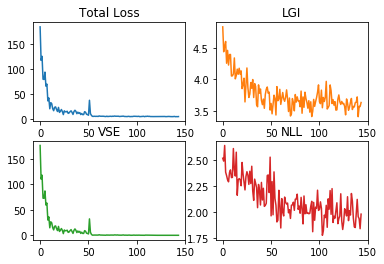

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(total)
axs[0, 0].set_title('Total Loss')
axs[0, 1].plot(lgi_loss, 'tab:orange')
axs[0, 1].set_title('LGI')
axs[1, 0].plot(vse, 'tab:green')
axs[1, 0].set_title('VSE')
axs[1, 1].plot(nll, 'tab:red')
axs[1, 1].set_title('NLL')

In [1]:
lines = open("/Users/yanjungao/Desktop/tuning/LGI60_step_tanh_8e-4_2020-07-30/scores.log").readlines()
def get_performance(lines):
    r_1 = []
    r_3 = []
    r_5 = []
    r_7 = [] 
    miou = [] 
    for l in lines:
        if "[LGI ONLY] [Valid]" in l:
            item = l.split(",")
            #print(item)
            r_1.append(float(item[2].split("=")[-1]))
            r_3.append(float(item[3].split("=")[-1]))
            r_5.append(float(item[4].split("=")[-1]))
            r_7.append(float(item[5].split("=")[-1]))
            miou.append(float(item[6].split("=")[-1]))
    return r_1, r_3, r_5, r_7, miou
r_1, r_3, r_5, r_7, miou = get_performance(lines)

Text(0.5, 1.0, 'miou')

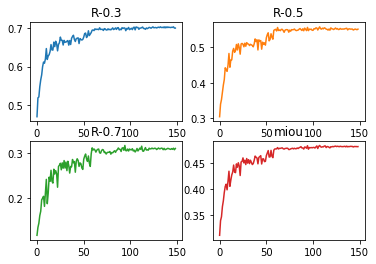

In [2]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_3)
axs[0, 0].set_title('R-0.3')
axs[0, 1].plot(r_5, 'tab:orange')
axs[0, 1].set_title('R-0.5')
axs[1, 0].plot(r_7, 'tab:green')
axs[1, 0].set_title('R-0.7')
axs[1, 1].plot(miou, 'tab:red')
axs[1, 1].set_title('miou')

Text(0.5, 1.0, 'NLL')

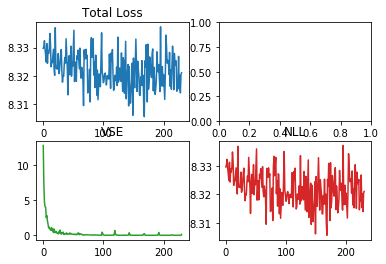

In [8]:
lines = open("/Users/yanjungao/Desktop/tuning/VSE_DECODE/log_vse_decode_tanh_0.0001.txt").readlines()
def get_loss_vse_decode(lines):
    total_loss = []
    vse = []
    nll = []
    lgi_loss = [] 
    for l in lines:
        if "[== VSE DECODE ==]" in l:
            total_loss.append(float(l.split("=")[5].split()[0]))
            vse.append(float(l.split("=")[6].split()[0]))
            nll.append(float(l.split("=")[7].split()[0]))
    return total_loss, vse, nll

total, vse, nll = get_loss_vse_decode(lines)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(total)
axs[0, 0].set_title('Total Loss')
#axs[0, 1].plot(lgi_loss, 'tab:orange')
#axs[0, 1].set_title('LGI')
axs[1, 0].plot(vse, 'tab:green')
axs[1, 0].set_title('VSE')
axs[1, 1].plot(nll, 'tab:red')
axs[1, 1].set_title('NLL')

In [39]:
t = "[== VSE DECODE ==][Train] 27 epoch 88 iter, TOTAL LOSS = 16.8440 VSE LOSS = 17.0481 NLL LOSS = 8.3200 "
t.split("=")[7].split()[0]

'8.3200'

['2020-07-26 17:53:48', '041 EPOCH: [LGI ONLY] [Valid] 1 epoch 0 iter', ' R1-0.1 = 0.5846', ' R1-0.3 = 0.3971', ' R1-0.5 = 0.2408', ' R1-0.7 = 0.0816', ' mIoU = 0.2641\n']
['2020-07-26 17:56:43', '656 EPOCH: [LGI ONLY] [Valid] 2 epoch 0 iter', ' R1-0.1 = 0.6816', ' R1-0.3 = 0.5048', ' R1-0.5 = 0.3311', ' R1-0.7 = 0.1018', ' mIoU = 0.3253\n']
['2020-07-26 17:59:37', '237 EPOCH: [LGI ONLY] [Valid] 3 epoch 0 iter', ' R1-0.1 = 0.6794', ' R1-0.3 = 0.5124', ' R1-0.5 = 0.3330', ' R1-0.7 = 0.1145', ' mIoU = 0.3324\n']
['2020-07-26 18:02:30', '992 EPOCH: [LGI ONLY] [Valid] 4 epoch 0 iter', ' R1-0.1 = 0.7171', ' R1-0.3 = 0.5501', ' R1-0.5 = 0.3702', ' R1-0.7 = 0.1509', ' mIoU = 0.3621\n']
['2020-07-26 18:05:25', '293 EPOCH: [LGI ONLY] [Valid] 5 epoch 0 iter', ' R1-0.1 = 0.7368', ' R1-0.3 = 0.5970', ' R1-0.5 = 0.4345', ' R1-0.7 = 0.1902', ' mIoU = 0.3975\n']
['2020-07-26 18:08:20', '049 EPOCH: [LGI ONLY] [Valid] 6 epoch 0 iter', ' R1-0.1 = 0.7470', ' R1-0.3 = 0.6105', ' R1-0.5 = 0.4380', ' R1-0.7

Text(0.5, 1.0, 'miou')

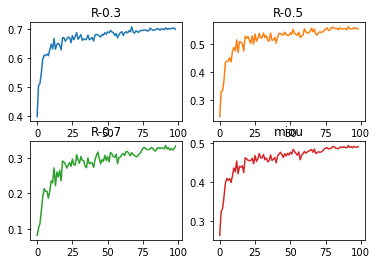

In [18]:
lines = open("scores_weightloss.log")
r_1, r_3, r_5, r_7, miou = get_performance(lines)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_3)
axs[0, 0].set_title('R-0.3')
axs[0, 1].plot(r_5, 'tab:orange')
axs[0, 1].set_title('R-0.5')
axs[1, 0].plot(r_7, 'tab:green')
axs[1, 0].set_title('R-0.7')
axs[1, 1].plot(miou, 'tab:red')
axs[1, 1].set_title('miou')

['2020-07-23 03:43:33', '709 EPOCH: [LGI ONLY] [Valid] 1 epoch 0 iter', ' R1-0.1 = 0.5808', ' R1-0.3 = 0.3995', ' R1-0.5 = 0.2274', ' R1-0.7 = 0.0711', ' mIoU = 0.2595\n']
['2020-07-23 03:46:27', '815 EPOCH: [LGI ONLY] [Valid] 2 epoch 0 iter', ' R1-0.1 = 0.6592', ' R1-0.3 = 0.4661', ' R1-0.5 = 0.2796', ' R1-0.7 = 0.1099', ' mIoU = 0.3063\n']
['2020-07-23 03:49:22', '950 EPOCH: [LGI ONLY] [Valid] 3 epoch 0 iter', ' R1-0.1 = 0.6670', ' R1-0.3 = 0.4984', ' R1-0.5 = 0.3324', ' R1-0.7 = 0.1339', ' mIoU = 0.3306\n']
['2020-07-23 03:52:17', '602 EPOCH: [LGI ONLY] [Valid] 4 epoch 0 iter', ' R1-0.1 = 0.7284', ' R1-0.3 = 0.5420', ' R1-0.5 = 0.3570', ' R1-0.7 = 0.1360', ' mIoU = 0.3545\n']
['2020-07-23 03:55:13', '672 EPOCH: [LGI ONLY] [Valid] 5 epoch 0 iter', ' R1-0.1 = 0.7368', ' R1-0.3 = 0.5975', ' R1-0.5 = 0.4165', ' R1-0.7 = 0.1988', ' mIoU = 0.3975\n']
['2020-07-23 03:58:08', '997 EPOCH: [LGI ONLY] [Valid] 6 epoch 0 iter', ' R1-0.1 = 0.7058', ' R1-0.3 = 0.5539', ' R1-0.5 = 0.4001', ' R1-0.7

Text(0.5, 1.0, 'miou')

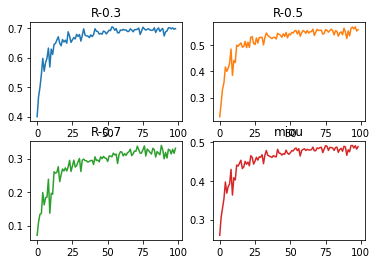

In [21]:
lines = open("vse_dom_scores.log")
r_1, r_3, r_5, r_7, miou = get_performance(lines)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_3[:99])
axs[0, 0].set_title('R-0.3')
axs[0, 1].plot(r_5[:99], 'tab:orange')
axs[0, 1].set_title('R-0.5')
axs[1, 0].plot(r_7[:99], 'tab:green')
axs[1, 0].set_title('R-0.7')
axs[1, 1].plot(miou[:99], 'tab:red')
axs[1, 1].set_title('miou')

Text(0.5, 1.0, 'NLL')

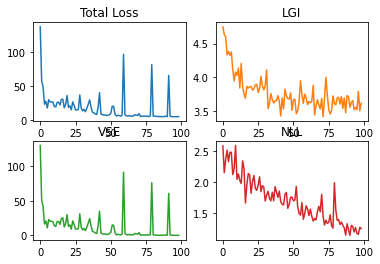

In [23]:
lines = open("log_attn_vse_dom.txt").readlines()
total, vse, nll, lgi_loss = get_loss(lines)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(total)
axs[0, 0].set_title('Total Loss')
axs[0, 1].plot(lgi_loss, 'tab:orange')
axs[0, 1].set_title('LGI')
axs[1, 0].plot(vse, 'tab:green')
axs[1, 0].set_title('VSE')
axs[1, 1].plot(nll, 'tab:red')
axs[1, 1].set_title('NLL')